In [1]:
from NN_Tree_Comparison import *

%load_ext autoreload
%autoreload 2
from virtual_screening.function import *
from virtual_screening.evaluation import *
from virtual_screening.models.deep_classification import *

Using Theano backend.
Using gpu device 1: Tesla K40m (CNMeM is disabled, CuDNN 4004)


In [2]:
running_index = 1
k = 5
pos_num = 50
neg_num = 200

In [3]:
directory = '../../dataset/fixed_dataset/fold_{}/'.format(k)
file_list = []
for i in range(k):
    file_list.append('{}file_{}.csv'.format(directory, i))
file_list = np.array(file_list)

# read data
test_index = running_index / 4
val_index = running_index % 4 + (running_index % 4 >= test_index)
complete_index = np.arange(k)
train_index = np.where((complete_index != test_index) & (complete_index != val_index))[0]

train_file_list = file_list[train_index]
val_file_list = file_list[val_index:val_index+1]
test_file_list = file_list[test_index:test_index+1]

In [4]:
label_name_list = ['Keck_Pria_AS_Retest']

train_pd = filter_out_missing_values(read_merged_data(train_file_list), label_list=label_name_list)
val_pd = filter_out_missing_values(read_merged_data(val_file_list), label_list=label_name_list)
test_pd = filter_out_missing_values(read_merged_data(test_file_list), label_list=label_name_list)

# extract data, and split training data into training and val
X_train, y_train = extract_feature_and_label(train_pd,
                                             feature_name='Fingerprints',
                                             label_name_list=label_name_list)
X_val, y_val = extract_feature_and_label(val_pd,
                                         feature_name='Fingerprints',
                                         label_name_list=label_name_list)
X_test, y_test = extract_feature_and_label(test_pd,
                                           feature_name='Fingerprints',
                                           label_name_list=label_name_list)

(43453, 1)
(14484, 1)
(14486, 1)


In [5]:
with open('../../output/cross_validation/single_classification_22.json', 'r') as f:
    conf = json.load(f)
single_task = SingleClassification(conf=conf)

PMTNN_weight_file = '../../output/cross_validation/single_classification_22/45540945/{}.weight'.format(running_index)
print PMTNN_weight_file
single_task.predict_with_existing(X_train, y_train, X_val, y_val, X_test, y_test,
                           PMTNN_weight_file=PMTNN_weight_file)


single_model = single_task.setup_model()
single_model.load_weights(PMTNN_weight_file)

y_pred_on_val_single_NN = single_model.predict(X_val)
y_pred_on_test_single_NN = single_model.predict(X_test)

../../output/cross_validation/single_classification_22/45540945/1.weight

train precision: 0.998314670017
train roc: 0.999998039294
train bedroc: 0.994706144082

validation precision: 0.307938220156
validation roc: 0.783930484518
validation bedroc: 0.612508723339

test precision: 0.0959068095274
test roc: 0.837264599171
test bedroc: 0.628970145806

ratio: 0.02, EF: 25.0,	active: 16.0
ratio: 0.01, EF: 43.75,	active: 16.0
ratio: 0.0015, EF: 208.333333333,	active: 16.0
ratio: 0.001, EF: 312.5,	active: 16.0


# Load

In [6]:
lightchem = np.load('temp/black_chem.npz')
print lightchem.files

['Keck_pria_as_retest_true', 'Keck_pria_as_retest_pred', 'Keck_Pria_Hard_Thresholded_true', 'Keck_RMI_cdd_pred', 'Keck_Pria_Hard_Thresholded_pred', 'Keck_Pria_FP_data_pred', 'Keck_RMI_cdd_true', 'Keck_Pria_FP_data_true', 'Molecule_ID']


In [7]:
y_test_pred_on_lightchem = lightchem['Keck_pria_as_retest_pred']
y_test_on_lightchem = lightchem['Keck_pria_as_retest_true']
id_list = lightchem['Molecule_ID']

In [8]:
y_test_pred_on_lightchem = reshape_data_into_2_dim(y_test_pred_on_lightchem)
y_test_on_lightchem = reshape_data_into_2_dim(y_test_on_lightchem)
get_rank(y_test_on_lightchem, y_test_pred_on_lightchem)

0.649785	    95/ 14486		Rank: 0.006558
0.436698	  1619/ 14486		Rank: 0.111763
0.559862	   281/ 14486		Rank: 0.019398
0.662866	    73/ 14486		Rank: 0.005039
0.593320	   198/ 14486		Rank: 0.013668
0.692287	    21/ 14486		Rank: 0.001450
0.692454	     1/ 14486		Rank: 0.000069
0.638888	   107/ 14486		Rank: 0.007386
0.655612	    82/ 14486		Rank: 0.005661
0.683448	    35/ 14486		Rank: 0.002416
0.501365	   516/ 14486		Rank: 0.035621
0.314578	  7215/ 14486		Rank: 0.498067
0.692454	    15/ 14486		Rank: 0.001035
0.692287	    20/ 14486		Rank: 0.001381
0.682540	    37/ 14486		Rank: 0.002554
0.692454	     6/ 14486		Rank: 0.000414


In [9]:
compare_rank(y_test, y_pred_on_test_single_NN, y_test_pred_on_lightchem)

 14424|	0.000033	768	Rank: 0.0531	|	0.649785	94	Rank: 0.0066
 14425|	0.000002	14219	Rank: 0.9816	|	0.436698	1618	Rank: 0.1118
 14426|	0.000029	998	Rank: 0.0690	|	0.559862	280	Rank: 0.0194
 14427|	0.160746	8	Rank: 0.0006	|	0.662866	72	Rank: 0.0050
 14428|	0.000026	1261	Rank: 0.0871	|	0.593320	197	Rank: 0.0137
 14429|	0.708671	5	Rank: 0.0004	|	0.692287	20	Rank: 0.0014
 14430|	0.000322	93	Rank: 0.0065	|	0.692454	0	Rank: 0.0001
 14431|	0.000028	1088	Rank: 0.0752	|	0.638888	106	Rank: 0.0074
 14432|	0.000078	253	Rank: 0.0175	|	0.655612	81	Rank: 0.0057
 14433|	0.000026	1307	Rank: 0.0903	|	0.683448	34	Rank: 0.0024
 14434|	0.000009	8550	Rank: 0.5903	|	0.501365	515	Rank: 0.0356
 14435|	0.000008	9949	Rank: 0.6869	|	0.314578	7214	Rank: 0.4981
 14436|	0.920472	4	Rank: 0.0003	|	0.692454	14	Rank: 0.0010
 14437|	0.069630	10	Rank: 0.0008	|	0.692287	19	Rank: 0.0014
 14438|	0.000193	116	Rank: 0.0081	|	0.682540	36	Rank: 0.0026
 14439|	0.040926	13	Rank: 0.0010	|	0.692454	5	Rank: 0.0004


In [10]:
test_list = [14424, 14425, 14426, 14428, 14431, 14434, 14435, 14438, 14439]
N = y_test.shape[0]
importance_index = [i for i in range(N)]
print_list(test_list, X_test, X_train, y_train, top=30,
           importance_index=importance_index, important_fetcher=1024)

testing Molecule:  14424
    298 |  sim: 0.864356	sim(only important): 0.864356		true label: 0
  14771 |  sim: 0.828325	sim(only important): 0.828325		true label: 0
  29200 |  sim: 0.796454	sim(only important): 0.796454		true label: 0
  15945 |  sim: 0.768000	sim(only important): 0.768		true label: 0
  30107 |  sim: 0.737031	sim(only important): 0.737031		true label: 0
  28906 |  sim: 0.737031	sim(only important): 0.737031		true label: 1  *
    277 |  sim: 0.737031	sim(only important): 0.737031		true label: 0
  14762 |  sim: 0.731310	sim(only important): 0.73131		true label: 0
  18202 |  sim: 0.706018	sim(only important): 0.706018		true label: 0
  15880 |  sim: 0.699234	sim(only important): 0.699234		true label: 0
  32191 |  sim: 0.693074	sim(only important): 0.693074		true label: 0
  38976 |  sim: 0.688098	sim(only important): 0.688098		true label: 0
   3713 |  sim: 0.680000	sim(only important): 0.68		true label: 0
  26604 |  sim: 0.668563	sim(only important): 0.668563		true label: 0


In [11]:
test_list = [14427, 14429, 14436, 14437, 14439]
print_list(test_list, X_val, X_train, y_train,
           importance_index=importance_index, important_fetcher=1024)

testing Molecule:  14427
  24637 |  sim: 0.769373	sim(only important): 0.769373		true label: 0
  43394 |  sim: 0.743256	sim(only important): 0.743256		true label: 1  *
  38977 |  sim: 0.692436	sim(only important): 0.692436		true label: 0
  10424 |  sim: 0.687184	sim(only important): 0.687184		true label: 0
   5747 |  sim: 0.687184	sim(only important): 0.687184		true label: 0
   5720 |  sim: 0.683330	sim(only important): 0.68333		true label: 0
   5712 |  sim: 0.679644	sim(only important): 0.679644		true label: 0
  24842 |  sim: 0.653967	sim(only important): 0.653967		true label: 0
  34701 |  sim: 0.650791	sim(only important): 0.650791		true label: 0
  24843 |  sim: 0.647098	sim(only important): 0.647098		true label: 0
  20189 |  sim: 0.632714	sim(only important): 0.632714		true label: 0
   5759 |  sim: 0.630604	sim(only important): 0.630604		true label: 0
   8957 |  sim: 0.613891	sim(only important): 0.613891		true label: 0
   1426 |  sim: 0.613891	sim(only important): 0.613891		true la

# Plot Distribution

In [12]:
cts_label = y_test_pred_on_lightchem[:, 0]
min_cts = int(min(cts_label))
max_cts = int(max(cts_label)) + 1

step = 0.01
x_axis = np.arange(min_cts, max_cts+step, step) * 100
mapper = dict()
for cts in x_axis:
    mapper[cts] = 0
for cts in cts_label:
    value = cts/step
    index = int(value)
    key = x_axis[index]
    mapper[key] += 1

(0, 100)

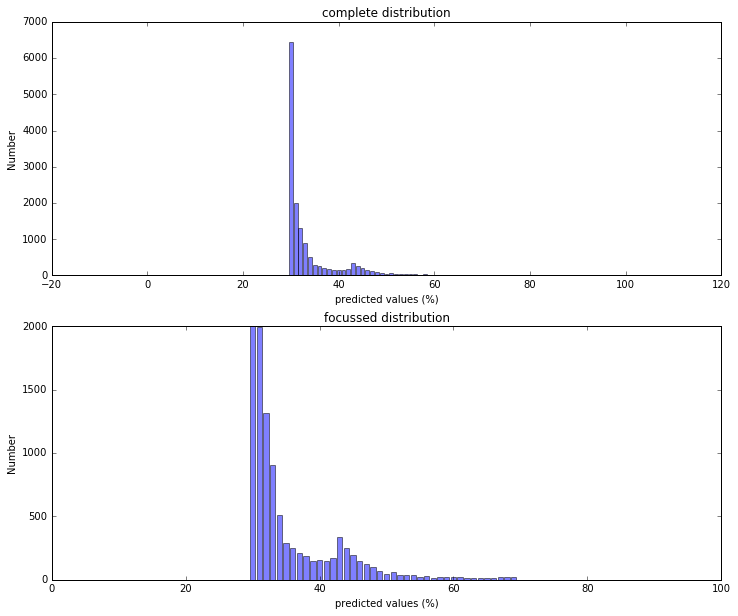

In [13]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 10.0)

x_axis = mapper.keys()
y_axis = mapper.values()


figure, axarr = plt.subplots(2, 1)
axarr[0].bar(x_axis, y_axis, align='center', alpha=0.5)
axarr[0].set_xlabel('predicted values (%)')
axarr[0].set_ylabel('Number')
axarr[0].set_title('complete distribution')
plt.xlim(0, 100)

axarr[1].bar(x_axis, y_axis, align='center', alpha=0.5)
axarr[1].set_xlabel('predicted values (%)')
axarr[1].set_ylabel('Number')
axarr[1].set_title('focussed distribution')
plt.ylim(0, 2000)
plt.xlim(0, 100)